### does REINFORCE with a neural network benefit from experience replay?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from utils import *
from collections import namedtuple

import torch as tr
import gym

%load_ext autoreload
%autoreload 2

In [2]:
def experiment(nseeds,neps,kw={}):
  """
  interactrion logic
  a < agent(s,h)
  s',r  < env (a)
  
  """
  metric = np.zeros((nseeds,neps))
  data = np.zeros((2,nseeds,neps))
  # loop over seeds
  for s in range(nseeds):
    np.random.seed(s)
    tr.manual_seed(s)
    # setup
    agent = REINFORCE(**kw)
    task = Task(task_name='CartPole-v1',max_ep_len=500)
    for e in range(neps):
      traj = task.play_ep(pi=agent.act)
      expD = unpack_expL(traj)
      metric[s,e] = np.sum(expD['reward'])
      agent.update(expD)
      epdata = agent.eval(expD)
      data[0,s,e] = epdata['entropy']
      data[1,s,e] = epdata['delta']
  return metric,data

# experiment(2,20,kw=None)

In [3]:
ns,ne = 3,3000
ACmetric,ACdata = experiment(ns,ne,kw={'TDupdate':True})
REmetric,REdata = experiment(ns,ne,kw={'TDupdate':False})

In [13]:
w = 50
movavg = lambda X: np.mean([X[i:i+w] for i in range(len(X)-w)],1)

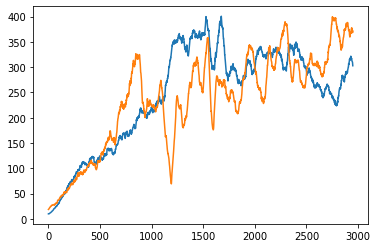

In [14]:
for metric in [ACmetric,REmetric]:
  M = metric.mean(0)
  M = movavg(M)
  plt.plot(M)

Text(0.5, 1.0, 'entropy of pi')

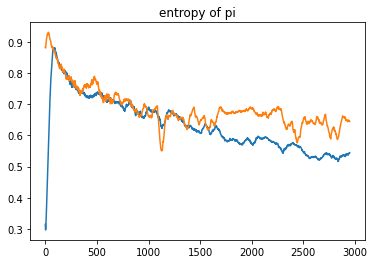

In [15]:
for data in [ACdata,REdata]:
  M = data[0].mean(0)
  M = movavg(M)
  plt.plot(M)
plt.title('entropy of pi')

Text(0.5, 1.0, 'value estimate error')

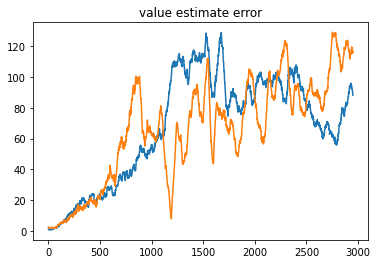

In [16]:
for data in [ACdata,REdata]:
  M = data[1].mean(0)
  M = movavg(M)
  plt.plot(M)
plt.title('value estimate error')